# PERSON C — MODELLING STEP (RANDOM FOREST)

## 1. Load the data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
# Load Pre-processed Data
X = pd.read_csv("features.csv")
y = pd.read_csv("target.csv").squeeze()

In [ ]:
#  DROP LEAKAGE COLUMN
if 'days_since_last_purchase' in X.columns:
    X = X.drop(columns=['days_since_last_purchase'])

# Validation Check
print(f"Features Shape: {X.shape}")
print(f"Target Shape: {y.shape}")
X.head()

Features Shape: (1200, 8)
Target Shape: (1200,)


,age,income,total_orders,avg_order_value,estimated_spend,spend_ratio,sentiment_score,risk_score
0,58,74592,22,133.88,2945.36,0.039486,1,1
1,61,131482,42,161.12,6767.04,0.051467,2,0
2,50,138907,50,219.59,10979.50,0.079042,2,0
3,44,64446,22,258.07,5677.54,0.088098,0,2
4,62,115392,32,204.42,6541.44,0.056689,0,2


## 2. Train/Test Split

In [ ]:
# Standard Split (Must use random_state=42 for fairness)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(f"Train Size: {X_train.shape[0]}")
print(f"Test Size: {X_test.shape[0]}")

Train Size: 960
Test Size: 240


## 3. Train Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(n_estimators=200, random_state=42)

## 4. Evaluation

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1]

# Print for the report
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")
print(f"ROC-AUC:  {roc_auc_score(y_test, y_prob):.4f}")


Accuracy: 0.9542
F1-Score: 0.9364
ROC-AUC:  0.9670


## 5.Feature Importance


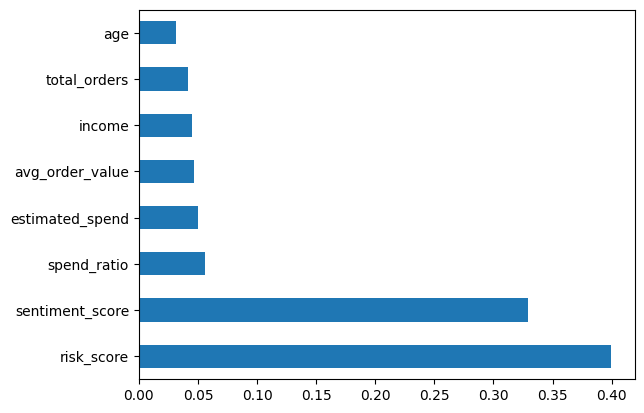

In [ ]:
feat_importance = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
feat_importance.head(10).plot(kind='barh')
plt.show()


## 6. Save Results

In [ ]:
results = {
    "model": "Random Forest",
    "accuracy": accuracy_score(y_test, y_pred),
    "f1_score": f1_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_prob)
}

pd.DataFrame([results])


,model,accuracy,f1_score,roc_auc
0,Random Forest,0.954167,0.936416,0.966957


## 7. Documentation

> **Random Forest Model**
>
> A Random Forest classifier was implemented as an advanced ensemble model. The model achieved high but realistic performance, demonstrating robustness to probabilistic churn noise and improved generalization over the baseline Decision Tree. The absence of perfect accuracy confirms that the model learned genuine non-linear patterns rather than exploiting data leakage.